# Exploration du dataset HAM10000
Chargement des métadonnées et visualisation rapide des classes et images.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

In [2]:
ROOT = Path.cwd().parent
metadata_path = ROOT / 'data' / 'raw' / 'HAM10000_metadata.csv'
images_dir = ROOT / 'data' / 'raw' / 'images'

df = pd.read_csv(metadata_path)

print("Nombre d'images :", len(df))
print("\nClasses :")
print(df['dx'].value_counts())

Nombre d'images : 10015

Classes :
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


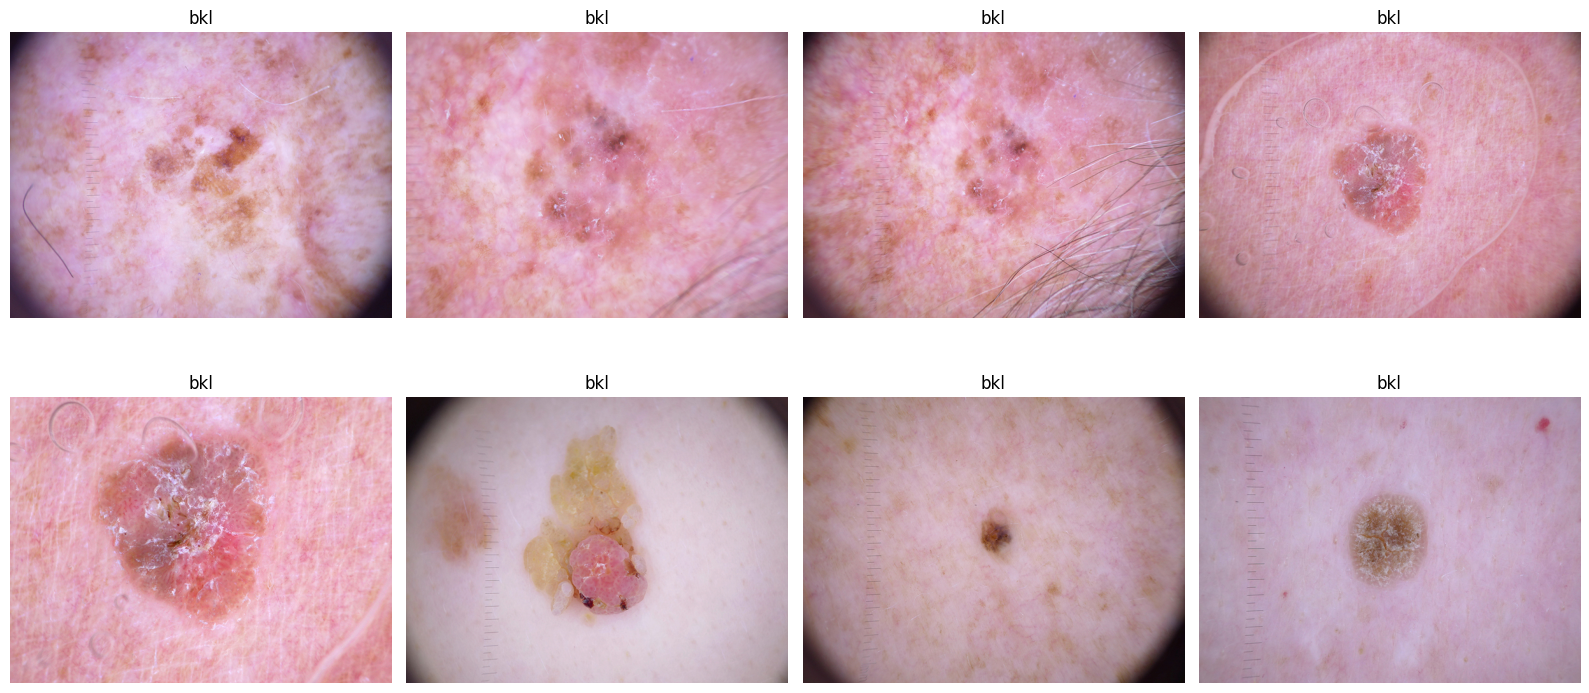

In [3]:
sample_df = df[df['image_id'].apply(lambda x: (images_dir / f'{x}.jpg').exists())].head(8).reset_index(drop=True)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    if i < len(sample_df):
        img_id = sample_df.iloc[i]['image_id']
        img = Image.open(images_dir / f'{img_id}.jpg')
        ax.imshow(img)
        ax.set_title(sample_df.iloc[i]['dx'])
    ax.axis('off')
plt.tight_layout()
plt.show()